<a href="https://colab.research.google.com/github/ayushp88/portfolio/blob/main/pulsar2_parabola.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import files
data_to_load = files.upload()

Saving pulsar2.csv to pulsar2.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(data_to_load['pulsar2.csv']))
import numpy as np
x=df['time']
y=df['y']
yerr=df['yerr']

In [ ]:
def model(x, m, p,c):
    return m*x**2 + p*x + c

In [ ]:
!pip install bilby
import bilby
likelihood = bilby.likelihood.GaussianLikelihood(x, y, model, yerr)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.2 MB 5.2 MB/s 
     |████████████████████████████████| 86 kB 6.6 MB/s 
     |████████████████████████████████| 46 kB 3.9 MB/s 
     |████████████████████████████████| 38.1 MB 262 kB/s 
  Created wheel for bilby: filename=bilby-1.1.5-py3-none-any.whl size=2250290 sha256=186b43f1c2e2862a64d832ee293c52f5e5a04c18c7f28c6afcc7d735d066ee23
  Stored in directory: /root/.cache/pip/wheels/d9/4b/7f/9b616adfbe3e613bf0abe6c320a9b5bc988e411201c12eca19
Successfully built bilby
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have img

In [ ]:
priors = dict()
priors["m"] = bilby.core.prior.Uniform(-10**-6, -10**-8, "m")
priors["p"] = bilby.core.prior.Uniform(10**-3, 10**-1, "p")
priors["c"] = bilby.core.prior.Uniform(-10**4,-10**2 ,"c")

17:17 bilby INFO    : Running for label 'linear_regression_2', output will be saved to 'outdir'
17:17 bilby INFO    : Search parameters:
17:17 bilby INFO    :   m = Uniform(minimum=-1e-06, maximum=-1e-08, name='m', latex_label='m', unit=None, boundary=None)
17:17 bilby INFO    :   p = Uniform(minimum=0.001, maximum=0.1, name='p', latex_label='p', unit=None, boundary=None)
17:17 bilby INFO    :   c = Uniform(minimum=-10000, maximum=-100, name='c', latex_label='c', unit=None, boundary=None)
17:17 bilby INFO    : Single likelihood evaluation took 3.139e-03 s


0it [00:00, ?it/s]

17:17 bilby WARNING : Supplied argument 'outdir2' not an argument of 'Dynesty', removing.
17:17 bilby INFO    : Checkpoint every check_point_delta_t = 600s
17:17 bilby WARNING : Using cached result
17:17 bilby INFO    : Summary of results:
nsamples: 10813
ln_noise_evidence:    nan
ln_evidence: -23033.735 +/-  1.302
ln_bayes_factor:    nan +/-  1.302



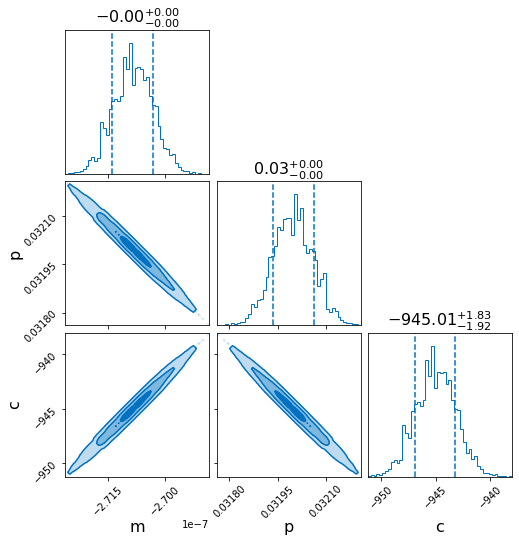

In [ ]:
injection_parameters = dict(m=-2.81720693e-07, p= 3.32839855e-02, c=-9.83063769e+02)
label = "linear_regression_2"
outdir2 = "outdir2"
bilby.utils.check_directory_exists_and_if_not_mkdir(outdir2)


result = bilby.run_sampler(
    likelihood=likelihood,
    priors=priors,
    sampler="dynesty",
    nlive=250,
    injection_parameters=injection_parameters,
    resume=False,
    outdir2=outdir2,
    label=label,
)

# Finally plot a corner plot: all outputs are stored in outdir
result.plot_corner()